# Final Assignment

## Himalayan Expeditions

I was looking through the tidytuesday github repo and saw that there was a dataset for expeditions to summit mountains in the Himalayas. I am an amateur climber with a latent dream of summitting a Himalayan mountain one day, so I wanted to check this data set out and see what the outcomes are like for expeditions.

Here are the statistics that I am interested in.

1. Most popular peaks
1. Success rate of the popular peaks
1. Death rate of the popular peaks
    
The data set I am using contains a record of expeditions from 1905 to 2019 of expeditions to more than 465 peaks in Nepal and bordering countries according to the Himalayan Database. Every expedition is an observation with descriptor variables and outcomes of the expedition.

![image link](https://cdn.britannica.com/17/83817-050-67C814CD/Mount-Everest.jpg)

In [2]:
#libraries, import data, and print data
library('tidyverse')

expeditions <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-22/expeditions.csv')

print(expeditions, width = Inf)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  expedition_id = col_character(),
  peak_id = col_character(),
  peak_name = col_character(),
  year = col_double(),
  season = col_character(),
  basecamp_date = col_date(format = ""),
  highpoint_date = col_date(format = ""),
  termination_date = col_date(fo

# A tibble: 10,364 x 16
   expedition_id peak_id peak_name     year season basecamp_date highpoint_date
   <chr>         <chr>   <chr>        <dbl> <chr>  <date>        <date>        
 1 ANN260101     ANN2    Annapurna II  1960 Spring 1960-03-15    1960-05-17    
 2 ANN269301     ANN2    Annapurna II  1969 Autumn 1969-09-25    1969-10-22    
 3 ANN273101     ANN2    Annapurna II  1973 Spring 1973-03-16    1973-05-06    
 4 ANN278301     ANN2    Annapurna II  1978 Autumn 1978-09-08    1978-10-02    
 5 ANN279301     ANN2    Annapurna II  1979 Autumn NA            1979-10-18    
 6 ANN280101     ANN2    Annapurna II  1980 Spring 1980-03-25    1980-04-24    
 7 ANN280102     ANN2    Annapurna II  1980 Spring 1980-04-09    1980-05-08    
 8 ANN281302     ANN2    Annapurna II  1981 Autumn 1981-09-04    1981-09-23    
 9 ANN281301     ANN2    Annapurna II  1981 Autumn 1981-09-04    1981-10-11    
10 ANN282301     ANN2    Annapurna II  1982 Autumn 1982-09-14    1982-10-04    
   termination_d

## Popular Peaks

I am interested mostly in the data of peaks that are highly traveled and explored so I am going to set the cutoff to be a minimum of 100 expeditions. I am going to set that the `termination_reason` being equal to 'Success (main peak)' as the requirement for a summit. I will use this to setup a dummy variable `success` where a summit = 1 and failure = 0 and then divide the number of `summits` by `count` of expeditions for each peak to create a `summitrate`. For the `deathrate` I will sum up the number of members, `nmembers`, and divide the deaths, `ndeaths`, by members per each peak.

In [3]:
poppeaks <- mutate(expeditions, success = ifelse(termination_reason == 'Success (main peak)', 1, 0)) %>%
    group_by(peak_name) %>% 
    summarize(nmembers = sum(members), ndeaths = sum(member_deaths), summits = sum(success), count = n()) %>% 
    filter(count >= 100) %>% 
    mutate(deathrate = ndeaths/nmembers) %>%
    mutate(summitrate = summits/count)

print(poppeaks)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 12 x 7
   peak_name     nmembers ndeaths summits count deathrate summitrate
   <chr>            <dbl>   <dbl>   <dbl> <int>     <dbl>      <dbl>
 1 Ama Dablam        6846      26     926  1366   0.00380      0.678
 2 Annapurna I       1453      54      80   243   0.0372       0.329
 3 Baruntse          1822       6     117   308   0.00329      0.380
 4 Cho Oyu           7362      42     832  1332   0.00570      0.625
 5 Dhaulagiri I      2242      63     160   383   0.0281       0.418
 6 Everest          15281     186    1321  2149   0.0122       0.615
 7 Himlung Himal      961       0      96   148   0            0.649
 8 Kangchenjunga     1162      34     112   184   0.0293       0.609
 9 Lhotse            2070      17     245   429   0.00821      0.571
10 Makalu            2026      30     153   356   0.0148       0.430
11 Manaslu           3434      69     313   632   0.0201       0.495
12 Pumori            1615      33     127   265   0.0204       0.479


## Visualizations

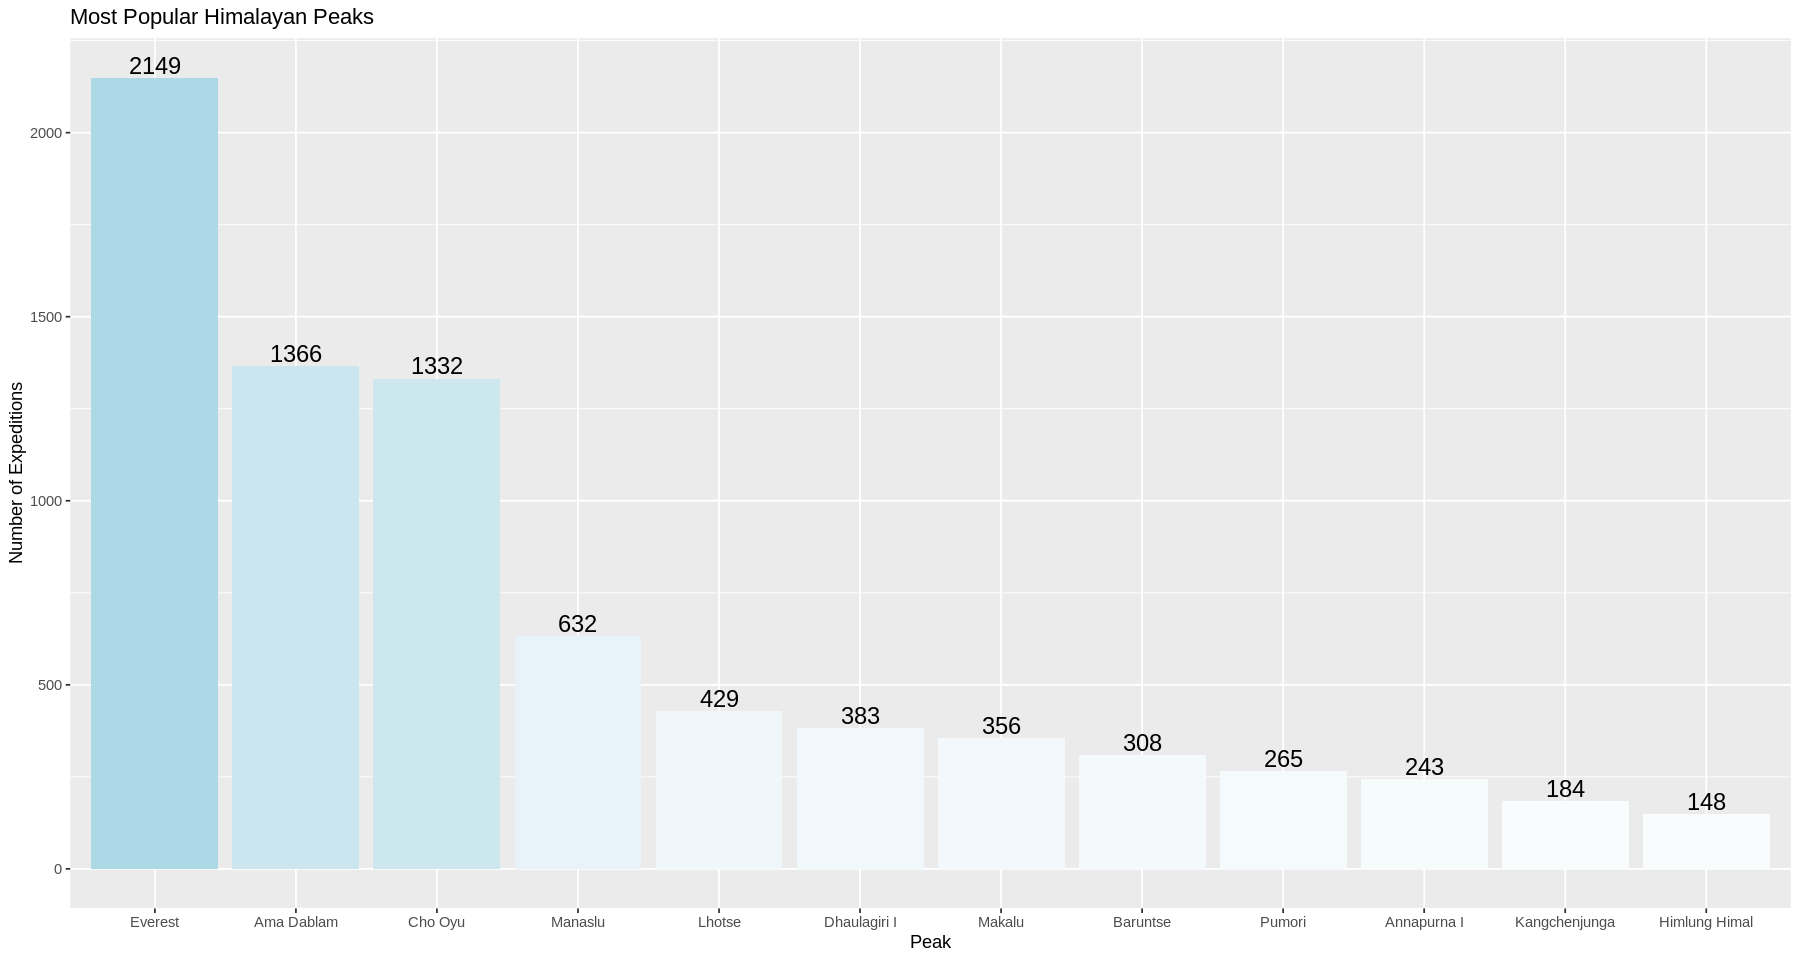

In [4]:
options(repr.plot.width=15, repr.plot.height=8)

p = ggplot(poppeaks, aes(x = reorder(peak_name, -count), y = count)) +
    geom_bar(stat='identity', aes(fill = count)) +
    scale_fill_gradient2(high='lightblue') +
    geom_text(aes(label=count), position = position_dodge(width=0.9), size = 5, vjust=-.25) + 
    ggtitle("Most Popular Himalayan Peaks") +
    xlab("Peak") + 
    ylab("Number of Expeditions") +
    theme(legend.position = "none")
p

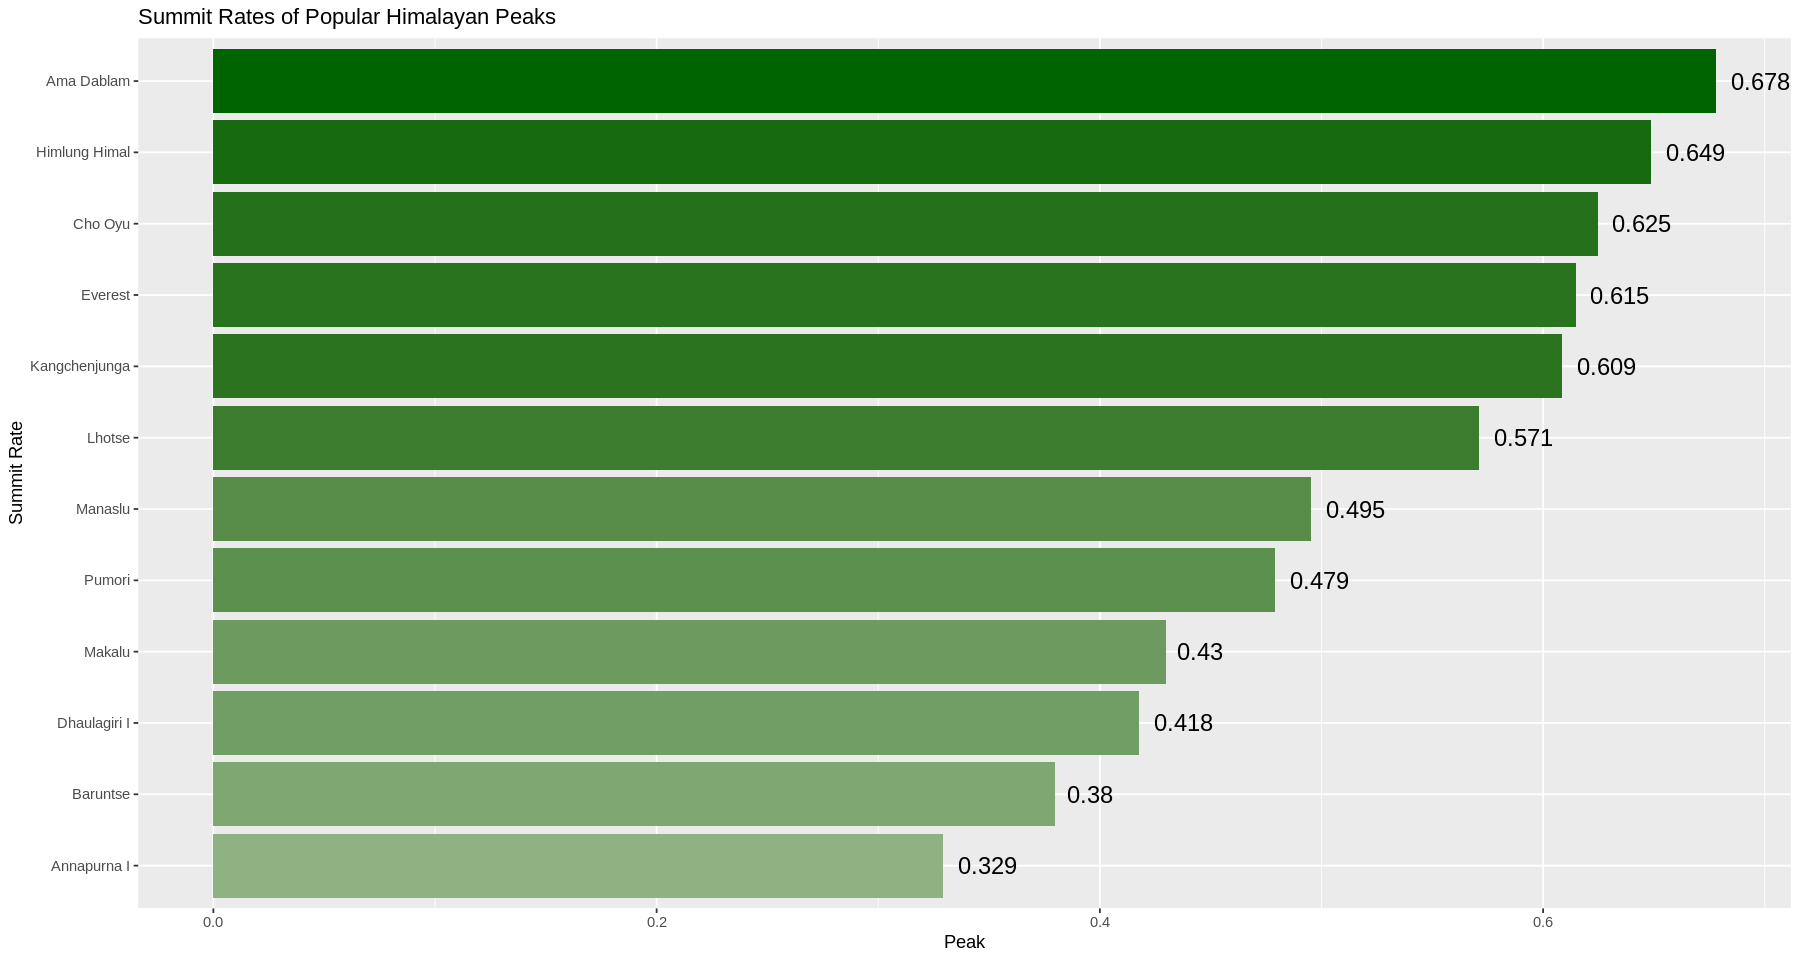

In [5]:
p = ggplot(poppeaks, aes(x = reorder(peak_name, summitrate), y = summitrate)) +
    geom_bar(stat='identity', aes(fill = summitrate)) +
    scale_fill_gradient2(high='darkgreen') +
    geom_text(aes(label=round(summitrate, digits = 3)), position = position_dodge(width=0.9), size = 5, hjust=-.25) +
    coord_flip() + 
    ggtitle("Summit Rates of Popular Himalayan Peaks") +
    xlab("Summit Rate") + 
    ylab("Peak") +
    theme(legend.position = "none")
p

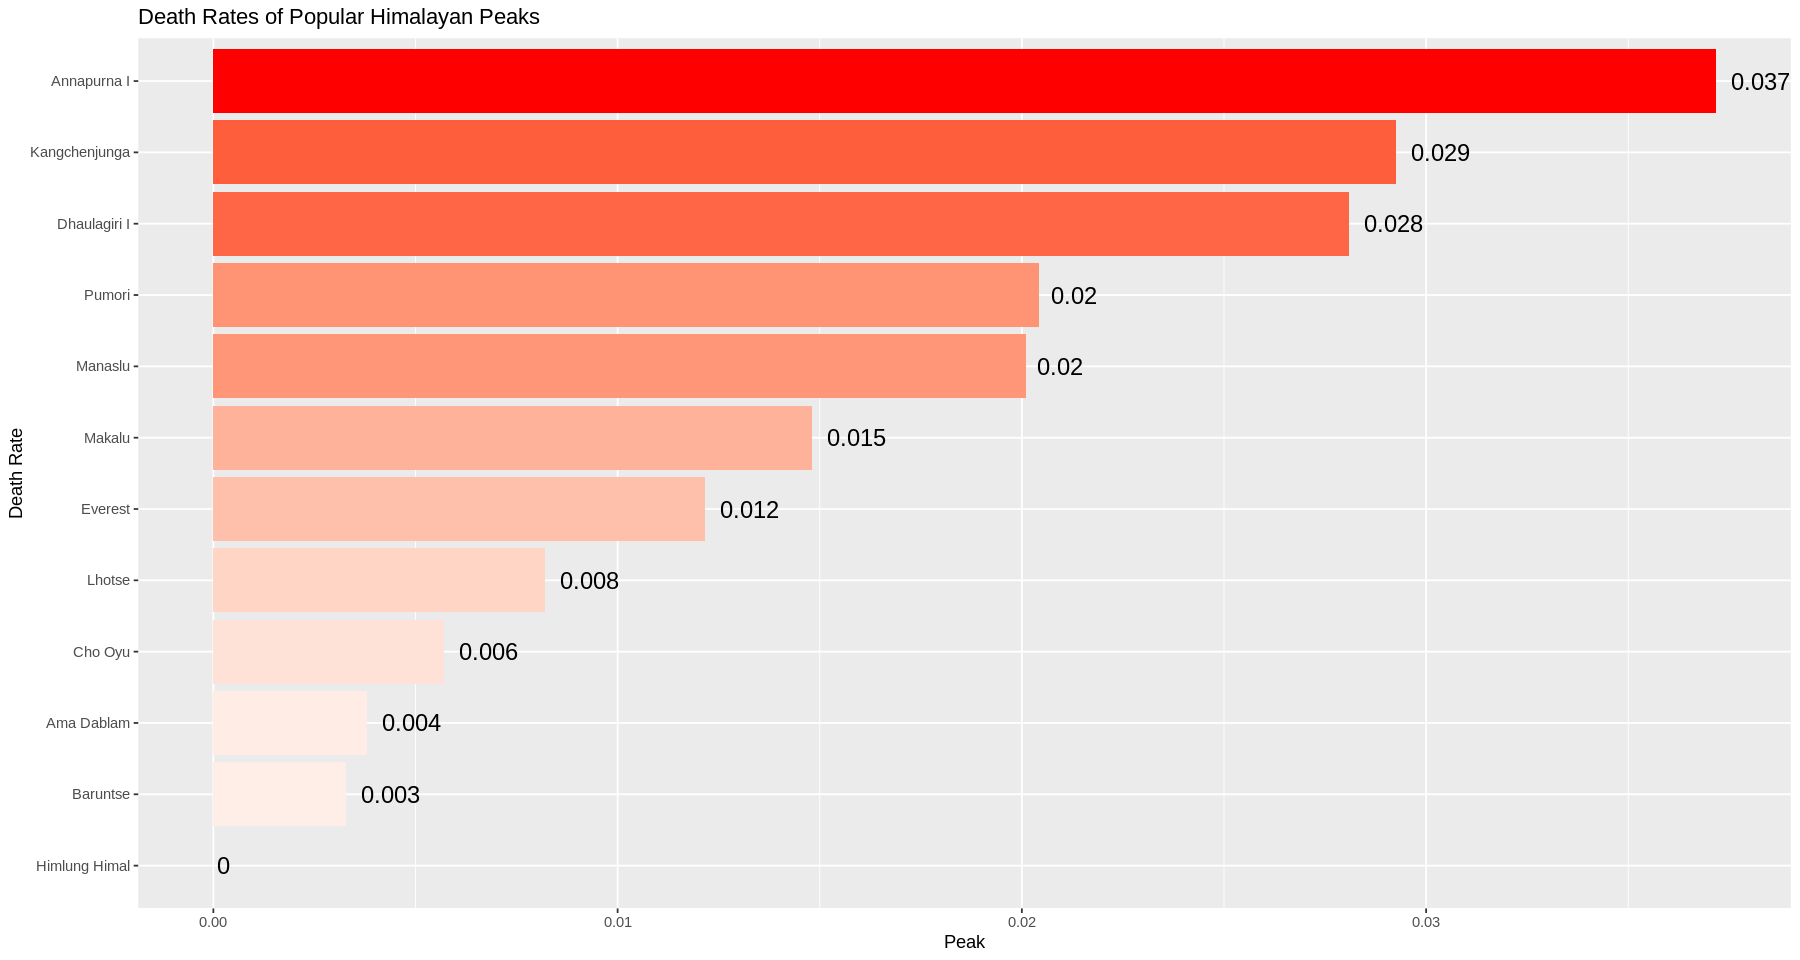

In [6]:
p = ggplot(poppeaks, aes(x = reorder(peak_name, deathrate), y = deathrate)) +
    geom_bar(stat='identity', aes(fill = deathrate)) +
    scale_fill_gradient2(high='red') +
    geom_text(aes(label=round(deathrate, digits = 3)), position = position_dodge(width=0.9), size = 5, hjust=-.25) +
    coord_flip() + 
    ggtitle("Death Rates of Popular Himalayan Peaks") +
    xlab("Death Rate") + 
    ylab("Peak") +
    theme(legend.position = "none")
p

## Thoughts

For the popularity graph there is the obvious answer in that Everest is the most popular mountain in the Himalayas. It has seen nearly a thousand more expeditions than the next most popular peak. I am surprised at the sheer drop off in expeditions from the top 3, I assumed that most Himalayan peaks had been explored thoroughly but I am happy to see that most mountains do not seem to be commercialized tourist destinations. I guess it is a reminder of how unhospitable the Himalayas are and how impressive it is to commericialize a mountain in that geography. Based off of this graph it seems that Everest, Ama Dablam, or Cho Oyu are good peaks to look into if I wanted to be on a mountain that has been explored more and possibly has more people around in case I would need any help.

Looking at the success rate and death rate graphs it is encouraging to see that Ama Dablam, Cho Oyu, and Everest are near the top and bottom of the two respectively. Even then Ama Dablam is quite far ahead of the other two in terms of success rate. It appears that if I want to see a summit I should avoid Annapurna I as it is by far the deadliest mountain paired with a meager success rate which is less than half that of Ama Dablam. Another interesting note is that Kangchenjunga has the second highest death rate yet still has a success rate of around 60%, perhaps this means that there were some uncharacteristically unfortunate accidents in the past whereas Annapurna I just seems to be an extremely difficult peak along with the dangers that come with climbing in the Himalayas. Based on these graphs it seems like Ama Dablam would be a great choice for when I am ready to climb my first Himalayan peak whereas Annapurna I seems to be a death wish. 

I've never heard of Ama Dablam before looking through this data set so here is a picture of it.

![image link](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Ama_Dablam2.jpg/1280px-Ama_Dablam2.jpg)